### Student: Graciele Maria Ludwig            
Setember/2024

#### Dataset: https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha)
#### License for use: https://creativecommons.org/licenses/by/4.0/legalcode

#### For what purpose was the dataset created?

" The National Poll on Healthy Aging dataset was created to gather insights on the health, healthcare, 
and health policy issues affecting Americans aged 50 and older. By focusing on the perspectives of older
adults and their caregivers, the University of Michigan aimed to inform the public, healthcare providers,
policymakers, and advocates about the various aspects of aging. This includes topics like health insurance, 
household composition, sleep issues, dental care, prescription medications, and caregiving, thereby providing 
a comprehensive understanding of the health-related needs and concerns of the older population (archive.ics.uci.edu, n.d.)."




In [1]:
# import libraries for manipulating the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

C:\Users\graci\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
health = pd.read_csv("healthy_aging.csv")   # use pandas to read the csv file

In [3]:
health.head(10)    # check head of dataset, the first five rows 

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2
5,2,2,3,2,4,3,0,0,0,1,0,3,3,1,1
6,3,2,4,1,1,3,0,0,1,1,0,2,1,1,1
7,2,2,3,2,6,3,1,0,0,0,0,3,3,1,1
8,2,2,3,1,2,3,0,0,1,1,0,3,3,1,2
9,1,2,2,1,3,1,0,0,0,0,1,3,3,1,1


## Adicional Variable Information

#### Class Labels

Number of Doctors Visited: The total count of different doctors the patient has seen = {
 1: 0-1 doctors
 2: 2-3 doctors
 3: 4 or more doctors
}

Age: The patient's age group = {
 1: 50-64
 2: 65-80
}

Physical Health: A self-assessment of the patient's physical well-being = {
 -1: Refused 
 1: Excellent 
 2: Very Good 
 3: Good
 4: Fair
 5: Poor
}

Mental Health: A self-evaluation of the patient's mental or psychological health = {
 -1: Refused 
 1: Excellent 
 2: Very Good 
 3: Good
 4: Fair
 5: Poor
}

Dental Health: A self-assessment of the patient's oral or dental health= {
 -1: Refused 
 1: Excellent 
 2: Very Good 
 3: Good
 4: Fair
 5: Poor
}

Employment: The patient's employment status or work-related information = {
 -1: Refused 6
 1: Working full-time
 2: Working part-time
 3: Retired
 4: Not working at this time
}

Stress Keeps Patient from Sleeping: Whether stress affects the patient's ability to sleep = {
 0: No
 1: Yes
}

Medication Keeps Patient from Sleeping: Whether medication impacts the patient's sleep = {
 0: No
 1: Yes
}

Pain Keeps Patient from Sleeping: Whether physical pain disturbs the patient's sleep = {
 0: No
 1: Yes
}

Bathroom Needs Keeps Patient from Sleeping: Whether the need to use the bathroom affects the patient's sleep = {
 0: No
 1: Yes
}

Unknown Keeps Patient from Sleeping: Unidentified factors affecting the patient's sleep = {
 0: No
 1: Yes
}

Trouble Sleeping: General issues or difficulties the patient faces with sleeping = {
 0: No
 1: Yes
}

Prescription Sleep Medication: Information about any sleep medication prescribed to the patient = {
 -1: Refused
 1: Use regularly
 2: Use occasionally
 3: Do not use
}

Race: The patient's racial or ethnic background = {
 -2: Not asked
 -1: REFUSED
 1: White, Non-Hispanic
 2: Black, Non-Hispanic
 3: Other, Non-Hispanic
 4: Hispanic
 5: 2+ Races, Non-Hispanic
}

Gender: The gender identity of the patient = {
 -2: Not asked
 -1: REFUSED
 1: Male
 2: Female
}

In [4]:
health.shape

(714, 15)

In [5]:
health.dtypes     # check data type

Number of Doctors Visited                     int64
Age                                           int64
Phyiscal Health                               int64
Mental Health                                 int64
Dental Health                                 int64
Employment                                    int64
Stress Keeps Patient from Sleeping            int64
Medication Keeps Patient from Sleeping        int64
Pain Keeps Patient from Sleeping              int64
Bathroom Needs Keeps Patient from Sleeping    int64
Uknown Keeps Patient from Sleeping            int64
Trouble Sleeping                              int64
Prescription Sleep Medication                 int64
Race                                          int64
Gender                                        int64
dtype: object

In [6]:
health.info()    # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient from Sleeping    

In [7]:
duplicates = health.duplicated()   # check for duplicates,its also posible select specific columns:  duplicates = health.duplicated(subset=['Gender', 'Age'])

In [8]:
health["Phyiscal Health"].unique() # information about a specific atribute

array([ 4,  3,  2,  5,  1, -1], dtype=int64)

In [9]:
unique_values = health.apply(lambda col: col.unique())   # use lambda functions for short-term use
print(unique_values)

Number of Doctors Visited                                  [3, 2, 1]
Age                                                              [2]
Phyiscal Health                                  [4, 3, 2, 5, 1, -1]
Mental Health                                    [3, 2, 1, 4, -1, 5]
Dental Health                                 [3, 4, 1, 6, 2, 5, -1]
Employment                                              [3, 1, 2, 4]
Stress Keeps Patient from Sleeping                            [0, 1]
Medication Keeps Patient from Sleeping                        [0, 1]
Pain Keeps Patient from Sleeping                              [0, 1]
Bathroom Needs Keeps Patient from Sleeping                    [0, 1]
Uknown Keeps Patient from Sleeping                            [1, 0]
Trouble Sleeping                                       [2, 3, 1, -1]
Prescription Sleep Medication                          [3, 1, 2, -1]
Race                                                 [1, 4, 2, 5, 3]
Gender                            

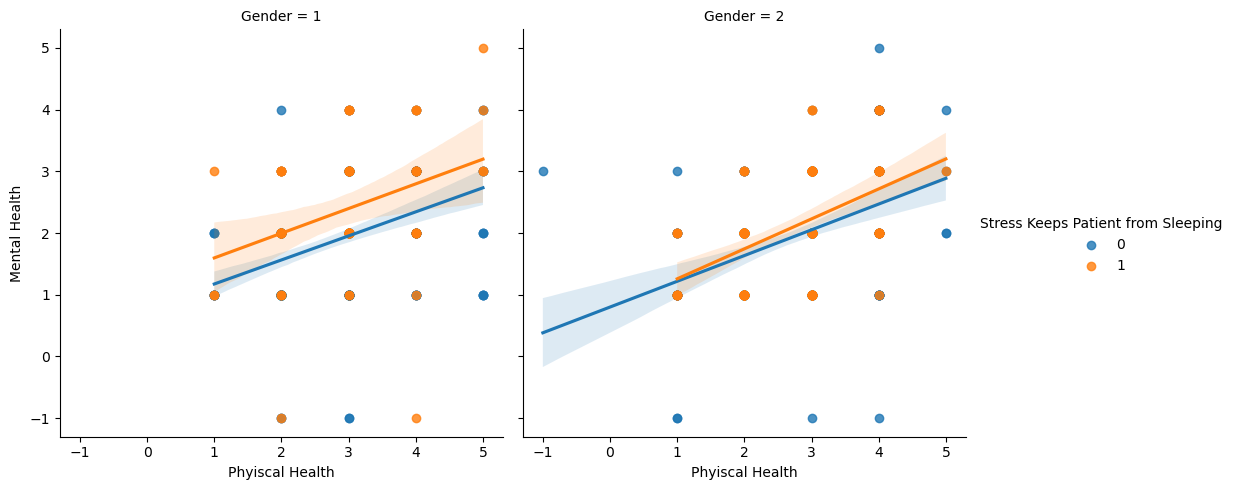

In [10]:
sns.lmplot(data=health, x='Phyiscal Health', y='Mental Health', hue='Stress Keeps Patient from Sleeping', col='Gender');

we can see that physical health and mental health are related in male and females, better the physical health, better is the mental health

In [11]:
sns.lmplot(data=health, x='Trouble Sleeping', y= 'Phyiscal Health', hue='Gender');

In [12]:
# checking a specific variable related to others
sns.pairplot(data=health, hue='Phyiscal Health', kind='reg');

In [13]:
unique_ages= health["Age"].unique()   # all interviewed were 65-80 years old
print(unique_ages)

[2]


In [14]:
 # removing column that is not necessary  as all participants are from the same age range
health_df = health.drop(columns=['Age']) 

In [15]:
health_df.groupby(["Gender"]).count()   # (1= male  2= Female)  , to see some info about a specific column

,Number of Doctors Visited,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race
Gender,,,,,,,,,,,,,
1,321,321,321,321,321,321,321,321,321,321,321,321,321
2,393,393,393,393,393,393,393,393,393,393,393,393,393


#### One-hot encoding transforms a categorical variable like gender into multiple binary (1 or 0) columns,  If a variable has for example 4 categories, it will be transformed into 4 binary columns, with one of them being "1" and the rest "0" for each observation/row.

In [16]:
### aply one hot encoding to the dataset, (1= true 0= false)
from sklearn.preprocessing import OneHotEncoder

In [17]:
columns_to_modify = ['Number of Doctors Visited','Phyiscal Health','Mental Health','Dental Health','Employment', 'Prescription Sleep Medication','Race', 'Gender' ]

In [18]:
# applying one hot encoding to the categorical columns
health_one_hot_encoded = pd.get_dummies(health_df, columns=columns_to_modify)

In [19]:
health_one_hot_encoded.head()

,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Number of Doctors Visited_1,Number of Doctors Visited_2,Number of Doctors Visited_3,Phyiscal Health_-1,...,Prescription Sleep Medication_1,Prescription Sleep Medication_2,Prescription Sleep Medication_3,Race_1,Race_2,Race_3,Race_4,Race_5,Gender_1,Gender_2
0,0,0,0,0,1,2,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
1,1,0,0,1,0,3,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
2,0,0,0,0,1,3,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,1,0,3,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0,2,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1


In [20]:
health_one_hot_encoded.shape

(714, 43)

In [21]:
# print a list with all column names
print(list(health_one_hot_encoded.columns))

['Stress Keeps Patient from Sleeping', 'Medication Keeps Patient from Sleeping', 'Pain Keeps Patient from Sleeping', 'Bathroom Needs Keeps Patient from Sleeping', 'Uknown Keeps Patient from Sleeping', 'Trouble Sleeping', 'Number of Doctors Visited_1', 'Number of Doctors Visited_2', 'Number of Doctors Visited_3', 'Phyiscal Health_-1', 'Phyiscal Health_1', 'Phyiscal Health_2', 'Phyiscal Health_3', 'Phyiscal Health_4', 'Phyiscal Health_5', 'Mental Health_-1', 'Mental Health_1', 'Mental Health_2', 'Mental Health_3', 'Mental Health_4', 'Mental Health_5', 'Dental Health_-1', 'Dental Health_1', 'Dental Health_2', 'Dental Health_3', 'Dental Health_4', 'Dental Health_5', 'Dental Health_6', 'Employment_1', 'Employment_2', 'Employment_3', 'Employment_4', 'Prescription Sleep Medication_-1', 'Prescription Sleep Medication_1', 'Prescription Sleep Medication_2', 'Prescription Sleep Medication_3', 'Race_1', 'Race_2', 'Race_3', 'Race_4', 'Race_5', 'Gender_1', 'Gender_2']


In [22]:
#renaming columns 
health_one_hot_encoded.rename(columns={'Number of Doctors Visited_1': 'Number of Doctors Visited: 0-1', 'Number of Doctors Visited_2': 'Number of Doctors Visited: 2-3', 'Number of Doctors Visited_3':'Number of Doctors Visited: 3 or more', 'Gender_1' : 'Male', 'Gender_2': 'Female', 'Prescription Sleep Medication_-1': 'Prescription Sleep Medication: refused ', 'Prescription Sleep Medication_1': 'Sleep Medication: use regularly', 'Prescription Sleep Medication_2': 'Prescription Sleep Medication: use ocassionaly', 'Prescription Sleep Medication_3': 'Prescription Sleep Medication: do not use'}, inplace=True)

In [23]:
health_one_hot_encoded.head()

,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Number of Doctors Visited: 0-1,Number of Doctors Visited: 2-3,Number of Doctors Visited: 3 or more,Phyiscal Health_-1,...,Sleep Medication: use regularly,Prescription Sleep Medication: use ocassionaly,Prescription Sleep Medication: do not use,Race_1,Race_2,Race_3,Race_4,Race_5,Male,Female
0,0,0,0,0,1,2,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
1,1,0,0,1,0,3,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
2,0,0,0,0,1,3,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,1,0,3,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0,2,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1


In [24]:
# save to a new df
health_one_hot_encoded.to_csv('processed_df.csv', index=False)

In [25]:
health_df2 = pd.read_csv("processed_df.csv") 

In [26]:
health_df2.head()

,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Number of Doctors Visited: 0-1,Number of Doctors Visited: 2-3,Number of Doctors Visited: 3 or more,Phyiscal Health_-1,...,Sleep Medication: use regularly,Prescription Sleep Medication: use ocassionaly,Prescription Sleep Medication: do not use,Race_1,Race_2,Race_3,Race_4,Race_5,Male,Female
0,0,0,0,0,1,2,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
1,1,0,0,1,0,3,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
2,0,0,0,0,1,3,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,1,0,3,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0,2,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1


In [27]:
health_df2.describe()   # statistical information

,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Number of Doctors Visited: 0-1,Number of Doctors Visited: 2-3,Number of Doctors Visited: 3 or more,Phyiscal Health_-1,...,Sleep Medication: use regularly,Prescription Sleep Medication: use ocassionaly,Prescription Sleep Medication: do not use,Race_1,Race_2,Race_3,Race_4,Race_5,Male,Female
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000,714.00000
mean,0.247899,0.056022,0.218487,0.504202,0.417367,2.407563,0.183473,0.521008,0.295518,0.001401,...,0.053221,0.047619,0.894958,0.809524,0.072829,0.028011,0.061625,0.028011,0.44958,0.55042
std,0.432096,0.230126,0.413510,0.500333,0.493470,0.670349,0.387325,0.499909,0.456595,0.037424,...,0.224632,0.213108,0.306822,0.392952,0.260038,0.165120,0.240641,0.165120,0.49780,0.49780
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [28]:
health_df2.shape

(714, 43)

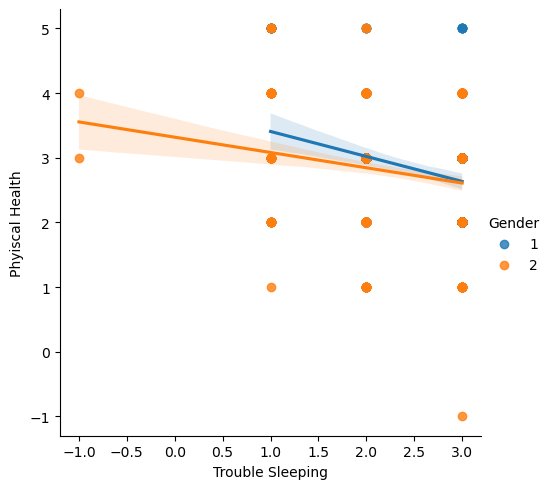

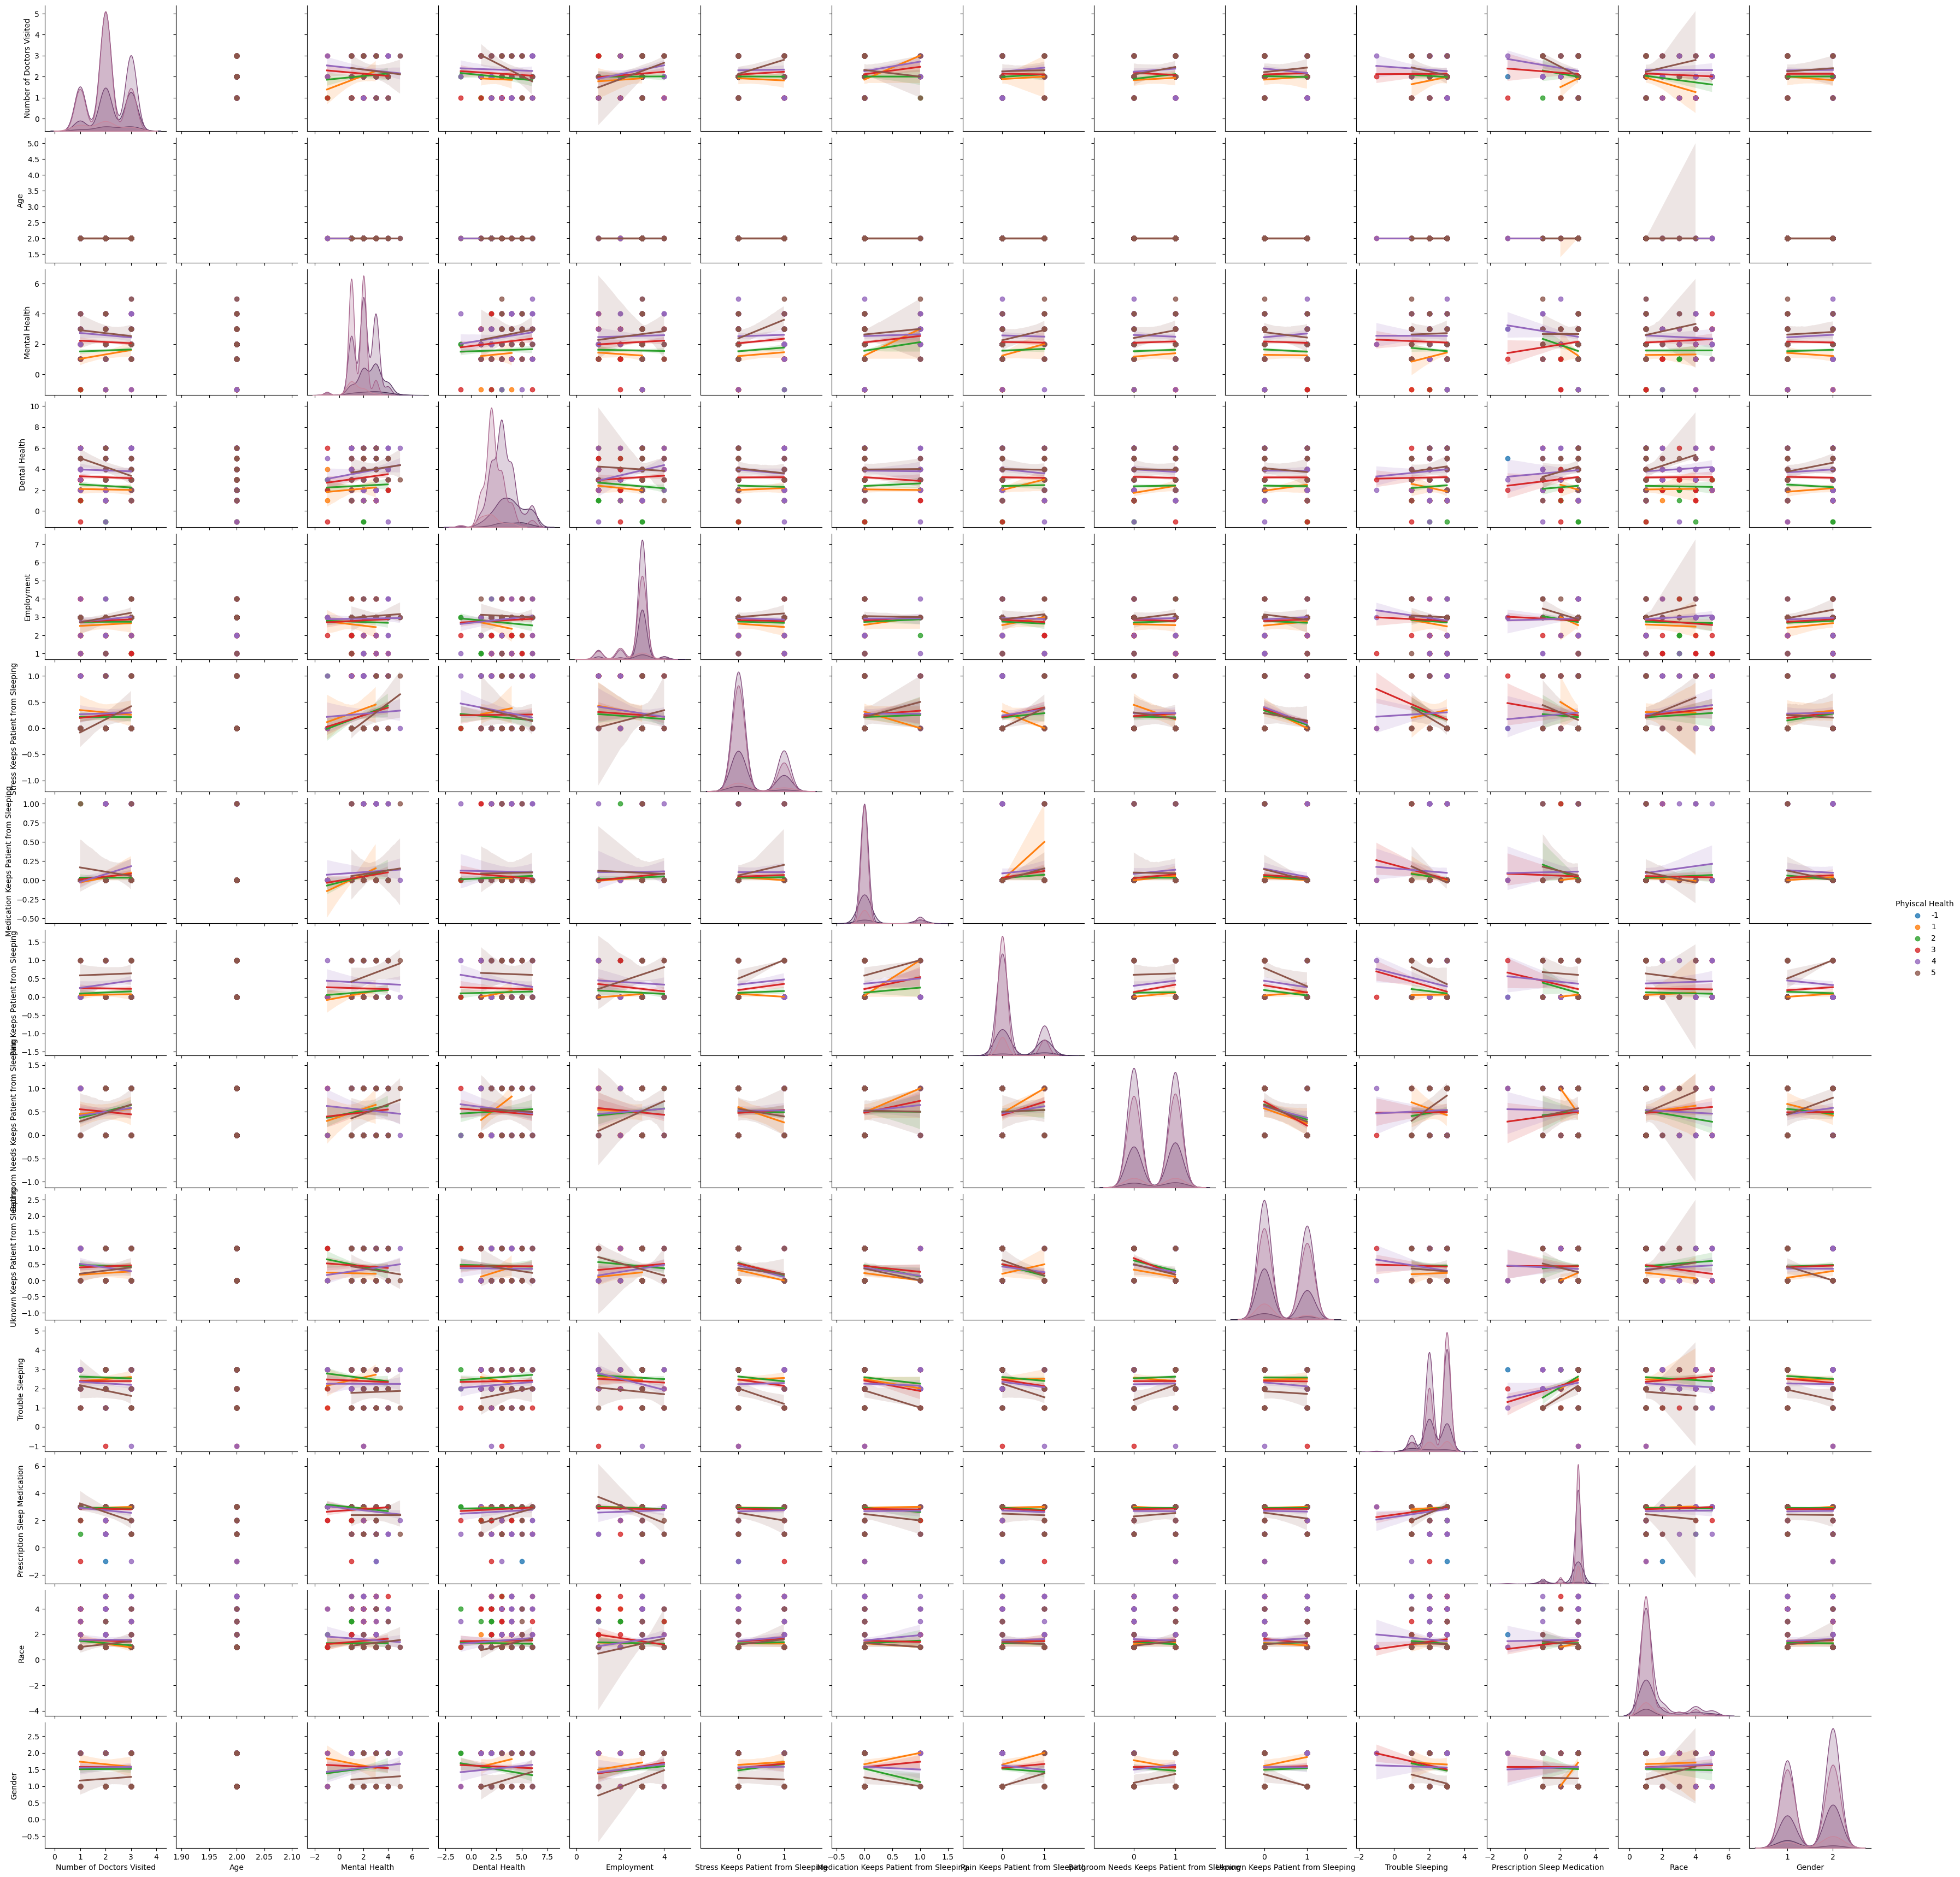

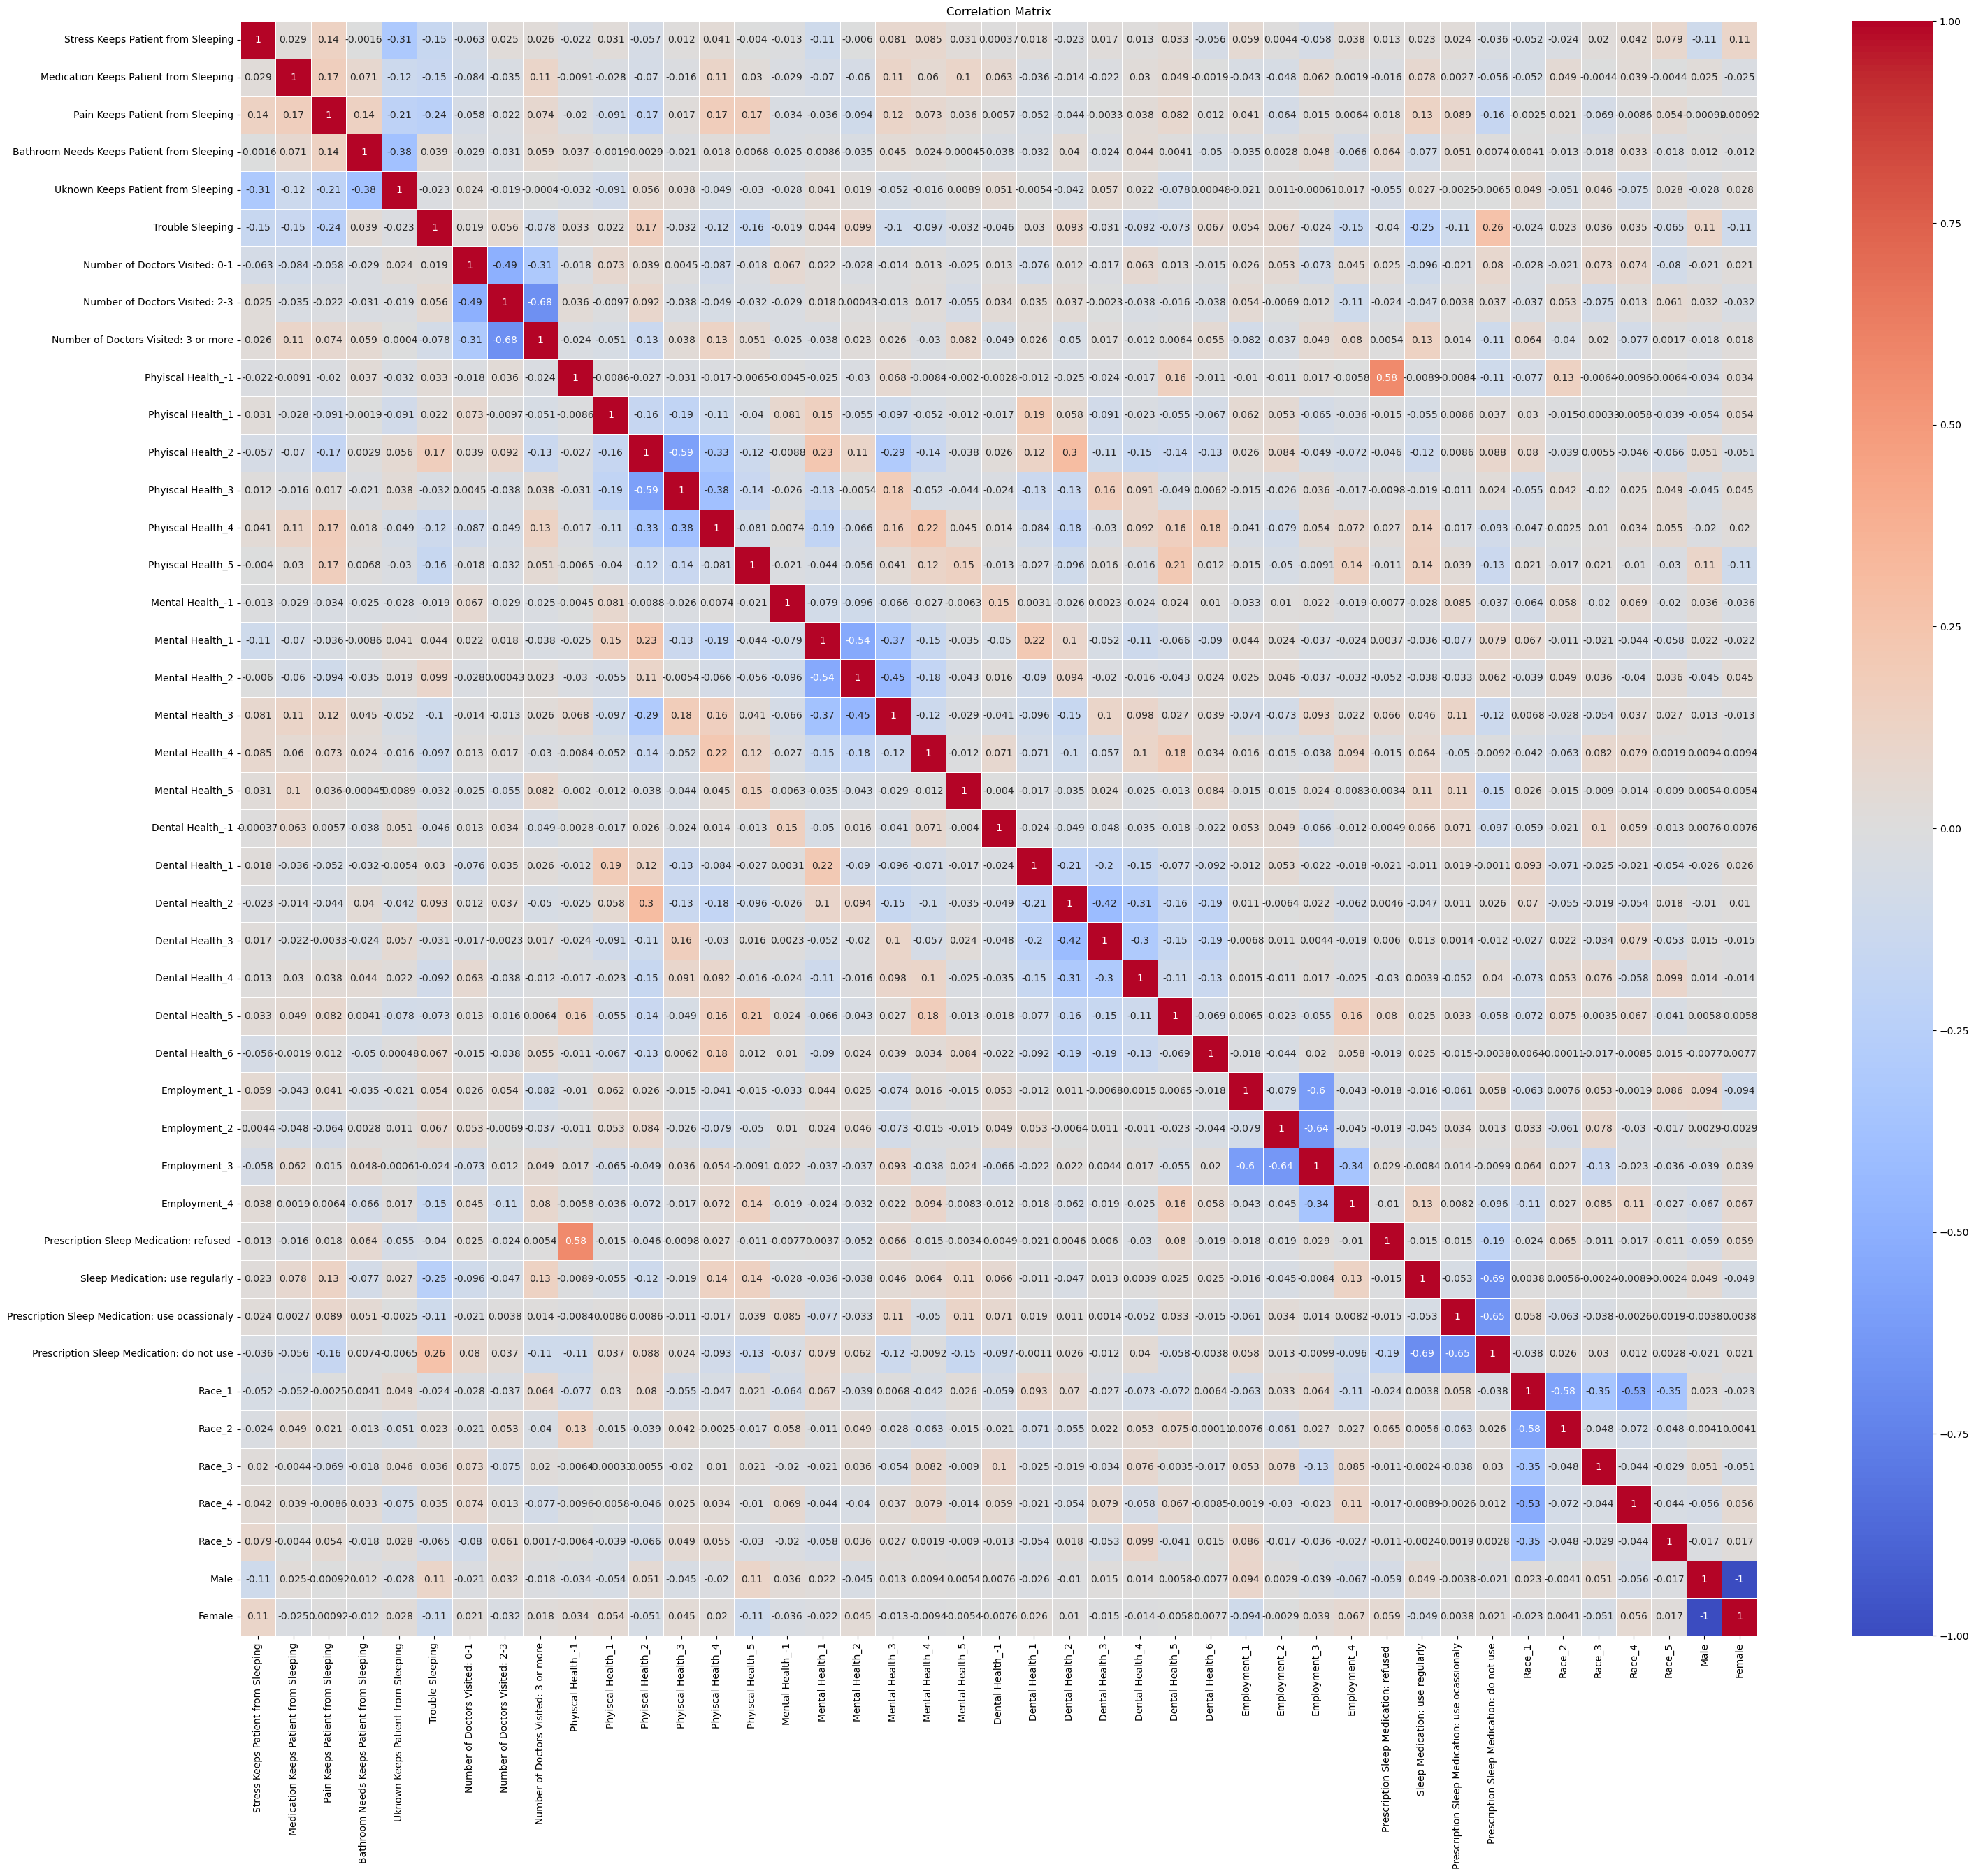

In [29]:
# Creating the heatmap to visualize correlation between variables
corr_matrix = health_df2.corr()

plt.figure(figsize=(35, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [30]:
#example of how to compare some specific variables 
#sns.pairplot(health_df2[['Female', 'Male', 'Race_2', 'Race_4','Employment_4', 'Phyiscal Health_1', 'Phyiscal Health_2', 'Phyiscal Health_4', 'Dental Health_5','Trouble Sleeping_1', 'Mental Health_1', 'Mental Health_3','Mental Health_4', 'Pain Keeps Patient from Sleeping']])
#plt.show()

In [31]:
# example of visualization with hue
#sns.lmplot(data=health_df2, x='Phyiscal Health_5', y= 'Trouble Sleeping_1', hue='Female');

Now that we know which atributes are related we can make some predictions


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

#### Get feature importance
feature_importances = model.feature_importances_
important_features = pd.Series(feature_importances, index=X.columns)
important_features.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

### before training the model for predictions we have to split the data into testing and training

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [38]:
X = health.drop('Phyiscal Health', axis=1)  # Drop the target column i want to make prediction
y = health['Phyiscal Health']

In [39]:
X_hot_encoded = pd.get_dummies(X, drop_first=True) 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_hot_encoded, y, test_size=0.2, random_state=42)

In [42]:
# Training a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
my_prediction = model.predict(X_test)

In [44]:
print("Model Accuracy:", accuracy_score(y_test,my_prediction))

Model Accuracy: 0.38461538461538464


In [47]:
reg = LinearRegression().fit(X_train, y_train)

In [48]:
my_prediction = reg.predict(X_test)

In [49]:
mean_squared_error(y_test, my_prediction)**0.5

0.7393669782789052

### Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier, export_text

In [55]:
tree = DecisionTreeClassifier()

In [56]:
tree = tree.fit(X_train,y_train)

In [58]:
tree_format = export_text(tree, feature_names=list(X.columns))
print(tree_format)

|--- Dental Health <= 2.50
|   |--- Mental Health <= 2.50
|   |   |--- Number of Doctors Visited <= 2.50
|   |   |   |--- Pain Keeps Patient from Sleeping <= 0.50
|   |   |   |   |--- Uknown Keeps Patient from Sleeping <= 0.50
|   |   |   |   |   |--- Prescription Sleep Medication <= 2.50
|   |   |   |   |   |   |--- Medication Keeps Patient from Sleeping <= 0.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- Medication Keeps Patient from Sleeping >  0.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Prescription Sleep Medication >  2.50
|   |   |   |   |   |   |--- Bathroom Needs Keeps Patient from Sleeping <= 0.50
|   |   |   |   |   |   |   |--- Employment <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Employment >  2.50
|   |   |   |   |   |   |   |   |--- Mental Health <= 1.50
|   |   |   |   |   |   |   |   |   |--- Trouble Sleeping <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3
| 

In [61]:
print(confusion_matrix(y_test, my_prediction))

[[ 2  3  2  1  0]
 [ 5 22 10  2  0]
 [ 3 19 26 13  0]
 [ 1  7 13  4  2]
 [ 0  1  3  3  1]]


In [62]:
print(classification_report(y_test, my_prediction))

              precision    recall  f1-score   support

           1       0.18      0.25      0.21         8
           2       0.42      0.56      0.48        39
           3       0.48      0.43      0.45        61
           4       0.17      0.15      0.16        27
           5       0.33      0.12      0.18         8

    accuracy                           0.38       143
   macro avg       0.32      0.30      0.30       143
weighted avg       0.38      0.38      0.38       143



In [63]:
# K-Nearest Neighbours
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
my_prediction = knn.predict(X_test)
accuracy_score(y_test, my_prediction)

C:\Users\graci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.45454545454545453

In [66]:
## Naive Bayes
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
my_prediction = nb.predict(X_test)
accuracy_score(y_test, my_prediction)

0.23776223776223776

In [69]:
# K-Fold Cross Validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
kf_results = cross_val_score(lda, X_train, y_train, cv=kfold, scoring='accuracy')

C:\Users\graci\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [70]:
kf_results.mean()

0.5148820326678766

In [71]:
y

0      4
1      4
2      3
3      3
4      3
      ..
709    2
710    2
711    4
712    3
713    3
Name: Phyiscal Health, Length: 714, dtype: int64

In [74]:
X_train

,Number of Doctors Visited,Age,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
264,3,2,2,4,3,0,1,1,0,0,1,3,2,2
56,2,2,2,2,3,0,0,0,0,1,3,3,1,2
204,3,2,2,3,3,0,0,0,1,1,2,3,1,1
571,2,2,1,1,3,0,0,0,0,0,3,3,1,1
527,2,2,3,2,3,0,0,0,0,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2,2,1,2,3,0,0,0,0,0,2,3,1,1
106,2,2,2,3,3,0,0,1,1,0,2,3,1,1
270,1,2,1,2,2,0,0,0,1,0,2,3,3,1
435,1,2,1,4,3,0,0,0,1,1,2,3,1,1
